In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
dataset = pd.read_csv('Otoritas Bank.csv')

In [12]:
dataset.head()

,ID,Score,Sex,Age,Authority,Money,Product no,Balance (estimated),Exited
0,15634602,619,0,42,2,0.00,1,101348.88,1
1,15647311,608,0,41,1,83807.86,1,112542.58,0
2,15619304,502,0,42,8,159660.80,3,113931.57,1
3,15701354,699,0,39,1,0.00,2,93826.63,0
4,15737888,850,0,43,2,125510.82,1,79084.10,0


In [14]:
x = dataset.iloc[:, [3,4]].values
y = dataset.iloc[:, -1].values

In [15]:
print(x)

[[42  2]
 [41  1]
 [42  8]
 [39  1]
 [43  2]
 [44  8]
 [50  7]
 [29  4]
 [44  4]
 [27  2]
 [31  6]
 [24  3]
 [34 10]
 [25  5]
 [35  7]
 [45  3]
 [58  1]
 [24  9]
 [45  6]
 [24  6]
 [41  8]
 [32  8]
 [38  4]
 [46  3]
 [38  5]
 [25  3]
 [36  2]
 [44  9]
 [43  3]
 [29  0]
 [39  3]
 [36  7]
 [41  9]
 [42  6]
 [29  9]
 [45  0]
 [31  3]
 [33  7]
 [36  7]
 [41  6]
 [40  4]
 [51  8]
 [61  2]
 [49  2]
 [61  5]
 [32  4]
 [27  9]
 [39  9]
 [38  2]
 [37  2]
 [44 10]
 [36  5]
 [33  5]
 [41  8]
 [42  1]
 [43  1]
 [45  5]
 [19  0]
 [66  4]
 [51  4]
 [35  5]
 [27  9]
 [33  1]
 [56  8]
 [26  4]
 [36  6]
 [34  1]
 [43 10]
 [35  5]
 [21  8]
 [58  2]
 [29  6]
 [37  0]
 [25  5]
 [36  9]
 [21  1]
 [55  8]
 [32  9]
 [33  5]
 [41 10]
 [34  1]
 [32  2]
 [36  3]
 [34  4]
 [46  4]
 [75 10]
 [22  3]
 [30  9]
 [46  4]
 [28  3]
 [44  5]
 [45  7]
 [36 10]
 [29  8]
 [42  4]
 [35 10]
 [41  9]
 [29  8]
 [22  8]
 [34  9]]


In [16]:
print(y)

[1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0]


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
print(x_train)

In [ ]:
len(x_train)

In [ ]:
len(x)

In [ ]:
len(x_test)

In [ ]:
len(y)

In [ ]:
len(y_test)

In [ ]:
len(y_train)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

In [ ]:
print(x_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
y_pred = classifier.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0]
 [ 8  1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


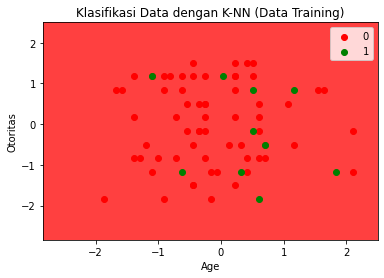

In [34]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x1.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Training)')
plt.xlabel('Age')
plt.ylabel('Otoritas')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


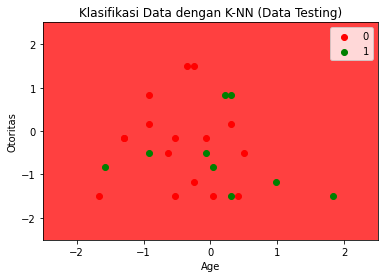

In [35]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x1.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Testing)')
plt.xlabel('Age')
plt.ylabel('Otoritas')
plt.legend()
plt.show()